<a href="https://colab.research.google.com/github/farnoosh27/Statistical_Analysis_usingR/blob/main/gapminder_dplyr_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using native R on Google Colab**
Farnoosh Azour

By the help of Dr.Chanin Nantasenamat, I am running R code in colab environment. 

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to use native R right inside Google Colab.

[Use R on Google Colab!](https://colab.research.google.com/notebook#create=true&language=r)

This tutorial will briefly show you how to do statistical analysis using R,
how to do t-test, linear regression,
and explores libraries such as ggplot2 and dplyr

## Installing libraries

In [58]:
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
library(gapminder)
data("gapminder")
summary(gapminder)


        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [60]:
summary(gapminder$gdpPercap)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   241.2   1202.1   3531.8   7215.3   9325.5 113523.1 

The following objects are masked from gapminder (pos = 4):

    continent, country, gdpPercap, lifeExp, pop, year


The following objects are masked from gapminder (pos = 5):

    continent, country, gdpPercap, lifeExp, pop, year


The following objects are masked from gapminder (pos = 6):

    continent, country, gdpPercap, lifeExp, pop, year


The following objects are masked from gapminder (pos = 7):

    continent, country, gdpPercap, lifeExp, pop, year




[1] 7023596

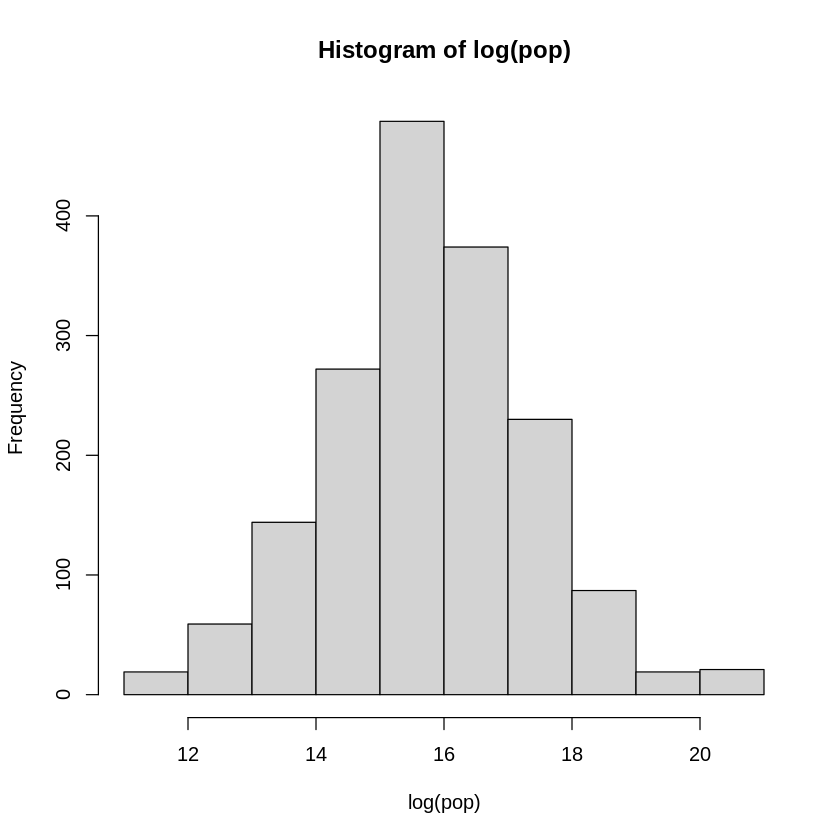

In [61]:
attach(gapminder)
median(pop)
hist(log(pop))

 the resulting plot would show the distribution of life expectancy values for each continent, 

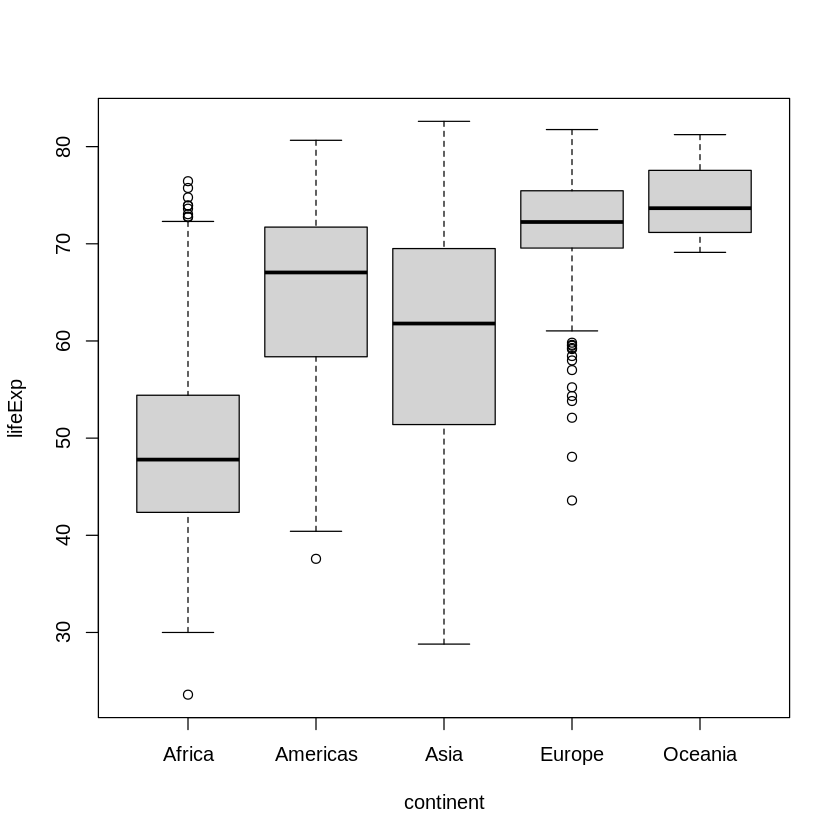

In [62]:
boxplot(lifeExp ~ continent)

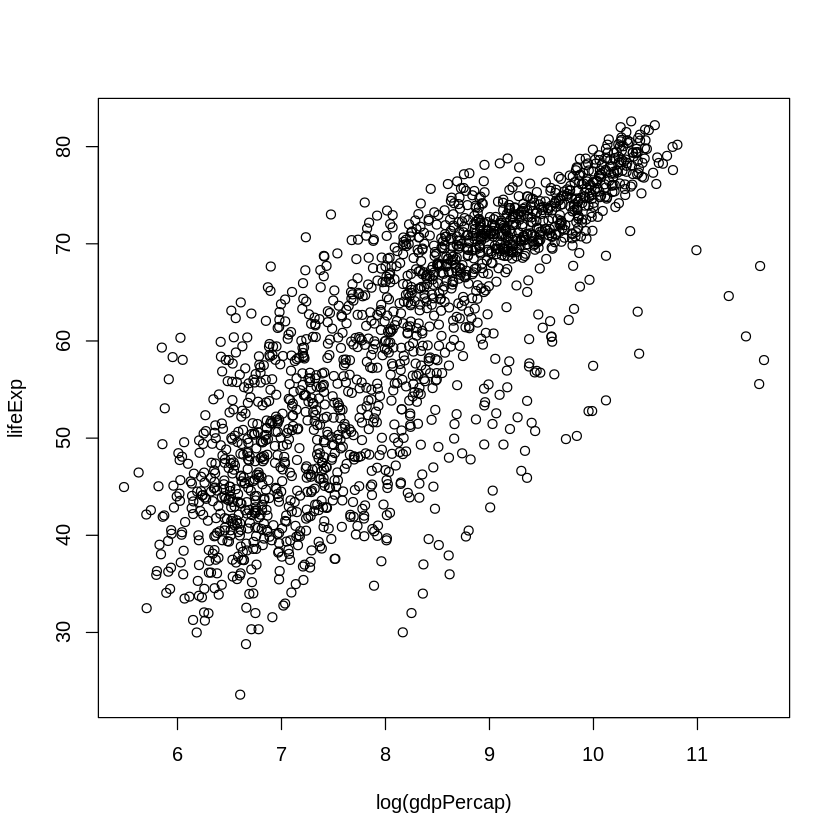

In [63]:
plot(lifeExp ~ log(gdpPercap))

## dplyr
 is an R package that provides a set of functions for data manipulation and transformation. The package is designed to be efficient and user-friendly, and it provides a consistent and intuitive interface for working with data frames

In [64]:
install.packages("dyplr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘dyplr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [65]:
library(dplyr)

gapminder %>%
  select(country, lifeExp) %>%
# choosing certain rows
  filter(country == "South Africa" |
    country == "Ireland") %>%
  group_by(country) %>%
  summarise(Average_life = mean(lifeExp))


country,Average_life
<fct>,<dbl>
Ireland,73.01725
South Africa,53.99317


In [70]:
## runing a t test
df1<- gapminder %>%
  select(country, lifeExp) %>%
# choosing certain rows
  filter(country == "South Africa" |
    country == "Ireland") 

  t.test(data = df1, lifeExp ~ country)



	Welch Two Sample t-test

data:  lifeExp by country
t = 10.067, df = 19.109, p-value = 4.466e-09
alternative hypothesis: true difference in means between group Ireland and group South Africa is not equal to 0
95 percent confidence interval:
 15.07022 22.97794
sample estimates:
     mean in group Ireland mean in group South Africa 
                  73.01725                   53.99317 


Null Hypothesis: The average life expectency is that the difference between these two countries is zero.
Alternative Hypothesis: The average life expectency is not the same.
because p-value is so low, almost close to zero, we are able to **reject the null hypothesis.**


## ggplot2 
is an R package that provides a powerful and flexible system for creating data visualizations. It is based on the grammar of graphics, a concept introduced by Leland Wilkinson, which provides a structured approach for creating and modifying plots.

With ggplot2, you can create a wide variety of visualizations, including scatter plots, line plots, bar charts, histograms, and many others. The package provides a consistent and intuitive syntax for creating plots, and it allows you to customize every aspect of a plot, including the appearance of the axes, the color scheme, and the layout.

In [74]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



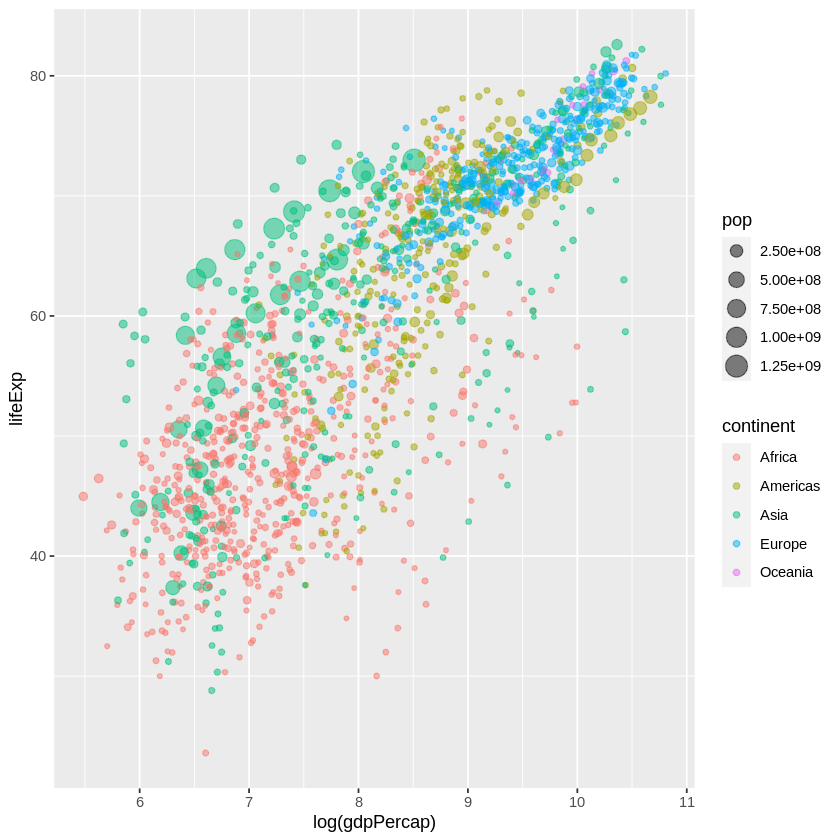

In [90]:
gapminder %>%
  filter(gdpPercap < 50000) %>% 
  # The pipe operator gives us the leverage to choose what values to feed in
  ggplot(aes(x=log(gdpPercap), y = lifeExp, col=continent, size = pop))+ 
  #making th epoints transparent using alpha
  geom_point(alpha=0.5)
  #facet_wrap(~continent)

The resulting plot will have GDP per capita on the x-axis, life expectancy on the y-axis, and points colored by continent. The transparency of the points is set to 0.5 to help distinguish overlapping points. This code is useful for visualizing the relationship between GDP per capita and life expectancy across different continents and countries.

In [93]:
## linear regression
lm(lifeExp ~ gdpPercap)


Call:
lm(formula = lifeExp ~ gdpPercap)

Coefficients:
(Intercept)    gdpPercap  
  5.396e+01    7.649e-04  
